# Gold and deflator in one spreadsheet


In [1]:
import pandas as pd
filename = 'gold and GDP deflator.xls'
gdp_df = pd.read_excel(filename, sheet_name='FRED Graph', header=11)
print(f'Read in {len(gdp_df)} records from {filename}.')
gdp_df.tail()

Read in 215 records from gold and GDP deflator.xls.


,observation_date,GOLDAMGBD228NLBM,GDPDEF
210,2020-10-01,1875.700781,114.439
211,2021-01-01,1797.926984,115.652
212,2021-04-01,1814.324590,117.413
213,2021-07-01,1790.398462,119.115
214,2021-10-01,1794.878906,NaN


In [2]:
gdp_df.dropna(how='any', inplace=True)
gdp_df.tail()

,observation_date,GOLDAMGBD228NLBM,GDPDEF
209,2020-07-01,1908.899231,113.888
210,2020-10-01,1875.700781,114.439
211,2021-01-01,1797.926984,115.652
212,2021-04-01,1814.324590,117.413
213,2021-07-01,1790.398462,119.115


In [3]:
gdp_df.set_index('observation_date', inplace=True)
gdp_df['quotient'] = gdp_df.GOLDAMGBD228NLBM / gdp_df.GDPDEF

In [4]:
gdp_df.head()

,GOLDAMGBD228NLBM,GDPDEF,quotient
observation_date,,,
1968-04-01,39.912097,19.499,2.046879
1968-07-01,39.615385,19.690,2.011955
1968-10-01,39.996484,19.968,2.003029
1969-01-01,42.687698,20.174,2.115976
1969-04-01,42.723387,20.431,2.091106


In [5]:
numpy_datetimes = gdp_df.index.values
first_yr = pd.to_datetime(numpy_datetimes).min().year
first_mo = pd.to_datetime(numpy_datetimes).min().month
last_yr = pd.to_datetime(numpy_datetimes).max().year
last_mo = pd.to_datetime(numpy_datetimes).max().month
print(f'Dates range from {first_mo}/{first_yr} to {last_mo}/{last_yr}')

Dates range from 4/1968 to 7/2021


# Seaborn

Out of the box

<AxesSubplot:xlabel='observation_date'>

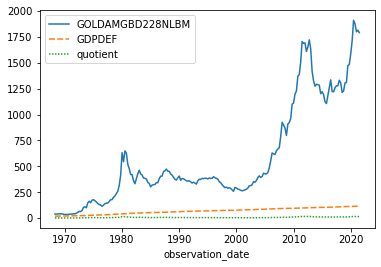

In [6]:
import seaborn as sns
sns.lineplot(data=gdp_df)

# Matplotlib

Seaborn has all the info from a single line of code. But scaling helps tell the picture.

Two y-axes with different scales: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
(twinx is the key)

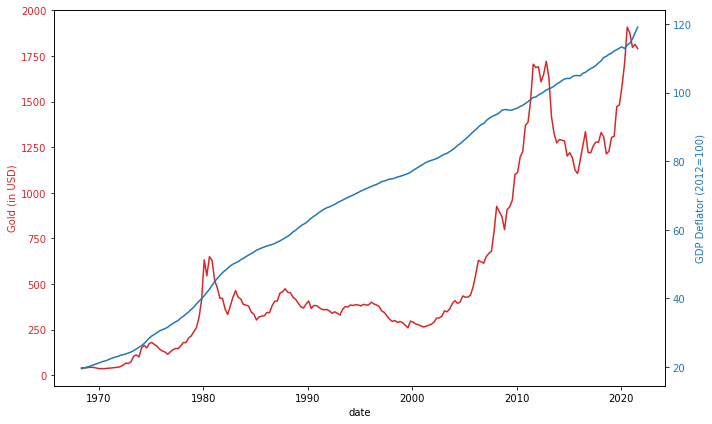

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(first_yr + first_mo/12, last_yr + last_mo / 12, len(gdp_df))
data1 = gdp_df.GOLDAMGBD228NLBM
data2 = gdp_df.GDPDEF

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Gold (in USD)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GDP Deflator (2012=100)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Using charts to persuade

Please, please, please: Use your new-found powers for good.

## Covid and the anti-vaxxers

Reference: https://fivethirtyeight.com/features/unvaccinated-america-in-5-charts/

which refers to https://www.kff.org/policy-watch/covid-19-vaccine-breakthrough-cases-data-from-the-states/

In [8]:
import pandas as pd
filename = 'KFF Covid 19 vaccine breakthrough cases by state.xlsx'
covid_df = pd.read_excel(filename, sheet_name='Sheet1', header=0)
print(f'Read in {len(covid_df)} records from {filename}.')
covid_df.head()

Read in 55 records from KFF Covid 19 vaccine breakthrough cases by state.xlsx.


,State,Observation Period*,Update Frequency,Total Number of Fully Vaccinated People,Total Number of COVID-19 Cases During Observation Period,Number of Fully Vaccinated People Diagnosed with COVID-19,Total Number of COVID-19 Hospitalizations During Observation Period,Number of Fully Vaccinated People Hospitalized with COVID-19**,Total Number of COVID-19 Deaths During Observation Period,Number of Fully Vaccinated People Who Have Died with COVID-19**,Source
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,1/1/21 - 7/17/21,Weekly,331185.0,23529.0,948.0,562.0,28.0,86.0,2.0,https://content.govdelivery.com/accounts/AKDHS...
2,Arizona,"Cases: 5/1/21 - 6/30/21, Deaths: 1/1/21 - 7/14/21",Periodic,3236843.0,29821.0,1759.0,NaN,NaN,9232.0,92.0,https://directorsblog.health.azdhs.gov/uptick-...
3,Arkansas,1/1/21 - 7/29/21,One-time,1044173.0,157431.0,5683.0,13474.0,627.0,2611.0,68.0,Personal communication
4,California,1/1/21 - 7/22/21,Weekly,20927113.0,1558985.0,21083.0,118178.0,934.0,38154.0,93.0,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...


In [9]:
# Take out the * from the column names
orig_cols = covid_df.columns
rename_dict = {}
remove_me = "*"
for col in orig_cols:
    if remove_me in col:
        rename_dict[col] = col.replace(remove_me, '')
covid_df.rename(columns=rename_dict, inplace=True)
covid_df.head()

,State,Observation Period,Update Frequency,Total Number of Fully Vaccinated People,Total Number of COVID-19 Cases During Observation Period,Number of Fully Vaccinated People Diagnosed with COVID-19,Total Number of COVID-19 Hospitalizations During Observation Period,Number of Fully Vaccinated People Hospitalized with COVID-19,Total Number of COVID-19 Deaths During Observation Period,Number of Fully Vaccinated People Who Have Died with COVID-19,Source
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,1/1/21 - 7/17/21,Weekly,331185.0,23529.0,948.0,562.0,28.0,86.0,2.0,https://content.govdelivery.com/accounts/AKDHS...
2,Arizona,"Cases: 5/1/21 - 6/30/21, Deaths: 1/1/21 - 7/14/21",Periodic,3236843.0,29821.0,1759.0,NaN,NaN,9232.0,92.0,https://directorsblog.health.azdhs.gov/uptick-...
3,Arkansas,1/1/21 - 7/29/21,One-time,1044173.0,157431.0,5683.0,13474.0,627.0,2611.0,68.0,Personal communication
4,California,1/1/21 - 7/22/21,Weekly,20927113.0,1558985.0,21083.0,118178.0,934.0,38154.0,93.0,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...


In [10]:
## Drop the source column
cols_to_drop = ['Source', 'Observation Period', 'Update Frequency']
covid_df.drop(columns=cols_to_drop, inplace=True)

## Looking for breakthrough percentages
### Need to remove states with a NaN in the denominator. Those cols: 
should_not_have_nan_cols = ['Total Number of COVID-19 Cases During Observation Period', 
                           'Total Number of COVID-19 Hospitalizations During Observation Period',
                           'Total Number of COVID-19 Deaths During Observation Period']
### Which rows have NaNs?
df = covid_df.dropna(subset=should_not_have_nan_cols, inplace=False)
df

,State,Total Number of Fully Vaccinated People,Total Number of COVID-19 Cases During Observation Period,Number of Fully Vaccinated People Diagnosed with COVID-19,Total Number of COVID-19 Hospitalizations During Observation Period,Number of Fully Vaccinated People Hospitalized with COVID-19,Total Number of COVID-19 Deaths During Observation Period,Number of Fully Vaccinated People Who Have Died with COVID-19
1,Alaska,331185.0,23529.0,948.0,562.0,28.0,86.0,2.0
3,Arkansas,1044173.0,157431.0,5683.0,13474.0,627.0,2611.0,68.0
4,California,20927113.0,1558985.0,21083.0,118178.0,934.0,38154.0,93.0
7,Delaware,506457.0,53120.0,518.0,3722.0,22.0,636.0,8.0
8,District of Columbia,469462.0,15918.0,200.0,2685.0,13.0,296.0,4.0
14,Indiana,2883877.0,247830.0,2720.0,21185.0,132.0,4574.0,46.0
22,Michigan,4800032.0,473867.0,7696.0,40749.0,529.0,8078.0,217.0
26,Montana,468821.0,15620.0,500.0,2203.0,51.0,324.0,10.0
30,New Jersey,2873499.0,547414.0,1319.0,40768.0,30.0,7553.0,7.0
31,New Mexico,1005056.0,60287.0,696.0,4643.0,15.0,1787.0,6.0


In [11]:
total = 'Total Number of COVID-19 Deaths During Observation Period'
vaccinated = 'Number of Fully Vaccinated People Who Have Died with COVID-19' 
unvaccinated = 'Unvaccinated Deaths'
df[unvaccinated] = df[total] - df[vaccinated]
df

C:\Users\rajah\AppData\Local\Temp/ipykernel_41656/468270931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[unvaccinated] = df[total] - df[vaccinated]


,State,Total Number of Fully Vaccinated People,Total Number of COVID-19 Cases During Observation Period,Number of Fully Vaccinated People Diagnosed with COVID-19,Total Number of COVID-19 Hospitalizations During Observation Period,Number of Fully Vaccinated People Hospitalized with COVID-19,Total Number of COVID-19 Deaths During Observation Period,Number of Fully Vaccinated People Who Have Died with COVID-19,Unvaccinated Deaths
1,Alaska,331185.0,23529.0,948.0,562.0,28.0,86.0,2.0,84.0
3,Arkansas,1044173.0,157431.0,5683.0,13474.0,627.0,2611.0,68.0,2543.0
4,California,20927113.0,1558985.0,21083.0,118178.0,934.0,38154.0,93.0,38061.0
7,Delaware,506457.0,53120.0,518.0,3722.0,22.0,636.0,8.0,628.0
8,District of Columbia,469462.0,15918.0,200.0,2685.0,13.0,296.0,4.0,292.0
14,Indiana,2883877.0,247830.0,2720.0,21185.0,132.0,4574.0,46.0,4528.0
22,Michigan,4800032.0,473867.0,7696.0,40749.0,529.0,8078.0,217.0,7861.0
26,Montana,468821.0,15620.0,500.0,2203.0,51.0,324.0,10.0,314.0
30,New Jersey,2873499.0,547414.0,1319.0,40768.0,30.0,7553.0,7.0,7546.0
31,New Mexico,1005056.0,60287.0,696.0,4643.0,15.0,1787.0,6.0,1781.0


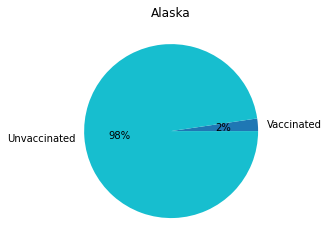

In [12]:
import matplotlib.pyplot as plt

x = [2, 84]
labels = ['Vaccinated', 'Unvaccinated', ]
colors = ['tab:blue', 'tab:cyan', ]

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Alaska')
plt.show()

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html

for row in df.itertuples():
    print(f'{row.State}: {row[8]} / {row[9]}')


Alaska: 2.0 / 84.0
Arkansas: 68.0 / 2543.0
California: 93.0 / 38061.0
Delaware: 8.0 / 628.0
District of Columbia: 4.0 / 292.0
Indiana: 46.0 / 4528.0
Michigan: 217.0 / 7861.0
Montana: 10.0 / 314.0
New Jersey: 7.0 / 7546.0
New Mexico: 6.0 / 1781.0
Oklahoma: 19.0 / 4909.0
Oregon: 11.0 / 1286.0
Tennessee: 31.0 / 5817.0
Utah: 9.0 / 630.0
Virginia: 37.0 / 2452.0
Washington: 48.0 / 2201.0


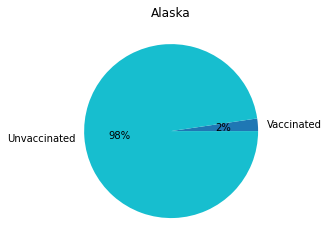

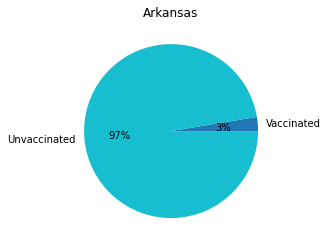

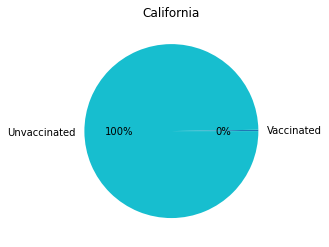

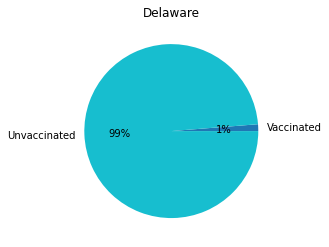

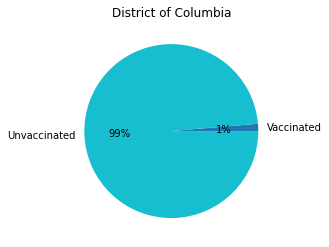

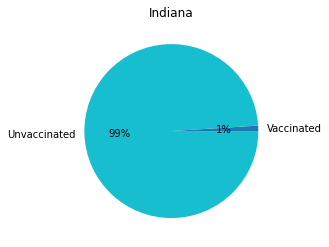

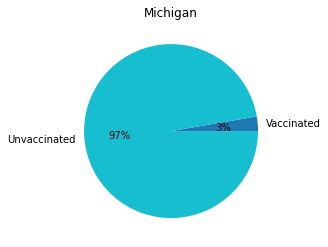

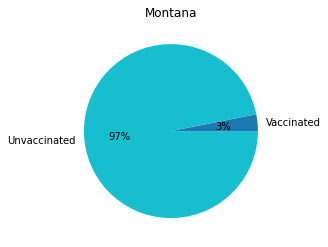

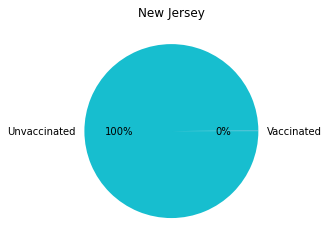

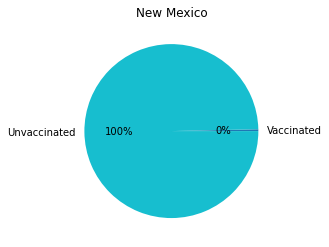

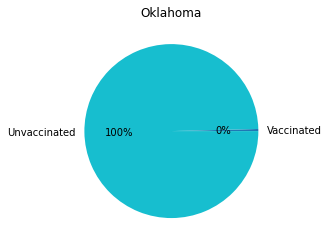

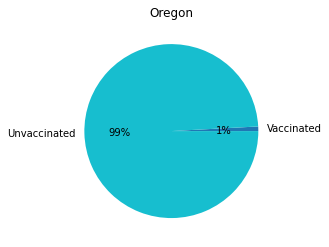

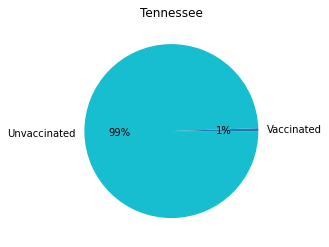

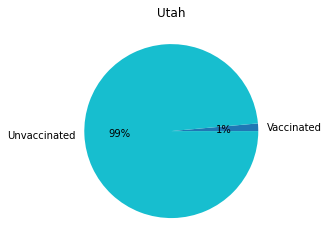

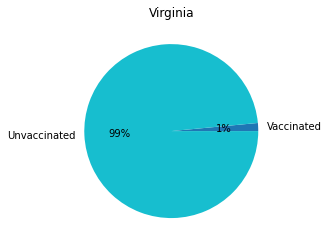

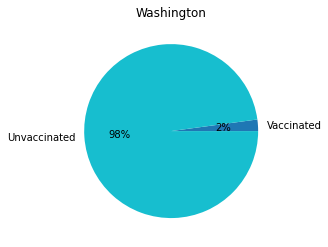

In [14]:
labels = ['Vaccinated', 'Unvaccinated', ]
colors = ['tab:blue', 'tab:cyan', ]

for row in df.itertuples():
    x = [row[8], row[9]]
    fig, ax = plt.subplots()
    ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
    ax.set_title(row.State)
    plt.show()

## A little more on itertuples

In [15]:
df_row = df.itertuples() # itertuples returns a map of the df

In [16]:
rows = list(df_row) # These are all the rows in df

In [17]:
rows[0]

Pandas(Index=1, State='Alaska', _2=331185.0, _3=23529.0, _4=948.0, _5=562.0, _6=28.0, _7=86.0, _8=2.0, _9=84.0)

# Refactoring the above

It's a little clunky to calculate the unvaccinated by hand. Can we do this automatically?
- In a class
- Specifying the Total column and Vaccinated colums to use


In [18]:
class Vaccinated():
    def __init__(self, df: pd.DataFrame, label: str, total_col: str, vacc_col: str):
        self._df = df
        self._label = df[label].tolist()
        self._total = df[total_col].tolist()
        self._vaccinated = df[vacc_col].tolist()

    @property
    def label(self, labels: list):
        self._label = labels

    @label.getter
    def label(self):
        return self._label

    @property
    def total(self, totals: list):
        self._total = np.array(totals)

    @total.getter
    def total(self):
        return self._total

    @property
    def vaccinated(self, vaccinated: list):
        self._vaccinated = np.array(vaccinated)

    @vaccinated.getter
    def vaccinated(self):
        return self._vaccinated

    def unvaccinated(self) -> list:
        return np.subtract(self.total, self.vaccinated)
        


In [19]:
total = 'Total Number of COVID-19 Deaths During Observation Period'
vaccinated = 'Number of Fully Vaccinated People Who Have Died with COVID-19'
deaths = Vaccinated(df=df, label='State', total_col=total, vacc_col=vaccinated)

In [20]:
deaths.unvaccinated()
#deaths.vaccinated

array([   84.,  2543., 38061.,   628.,   292.,  4528.,  7861.,   314.,
        7546.,  1781.,  4909.,  1286.,  5817.,   630.,  2452.,  2201.])

In [21]:
# Adding a namedtuple. More on namedtuples in a later module.
from collections import namedtuple

CovidNums = namedtuple("CovidNums", "state vaccinated unvaccinated")

class Vaccinated():
    def __init__(self, df: pd.DataFrame, label: str, total_col: str, vacc_col: str):
        self._df = df
        self._label = df[label].tolist()
        self._total = df[total_col].tolist()
        self._vaccinated = df[vacc_col].tolist()

    @property
    def label(self, labels: list):
        self._label = labels

    @label.getter
    def label(self):
        return self._label

    @property
    def total(self, totals: list):
        self._total = np.array(totals)

    @total.getter
    def total(self):
        return self._total

    @property
    def vaccinated(self, vaccinated: list):
        self._vaccinated = np.array(vaccinated)

    @vaccinated.getter
    def vaccinated(self):
        return self._vaccinated

    def unvaccinated(self) -> list:
        return np.subtract(self.total, self.vaccinated)

    def as_namedtuple_list(self) -> list:
        ans = []
        for i in range(len(self.total)):
            entry = CovidNums(state=self.label[i], vaccinated=self.vaccinated[i], unvaccinated=self.unvaccinated()[i])
            ans.append(entry)
        return ans


In [22]:
deaths = Vaccinated(df=df, label='State', total_col=total, vacc_col=vaccinated)
covid_stats = deaths.as_namedtuple_list()
covid_stats

[CovidNums(state='Alaska', vaccinated=2.0, unvaccinated=84.0),
 CovidNums(state='Arkansas', vaccinated=68.0, unvaccinated=2543.0),
 CovidNums(state='California', vaccinated=93.0, unvaccinated=38061.0),
 CovidNums(state='Delaware', vaccinated=8.0, unvaccinated=628.0),
 CovidNums(state='District of Columbia', vaccinated=4.0, unvaccinated=292.0),
 CovidNums(state='Indiana', vaccinated=46.0, unvaccinated=4528.0),
 CovidNums(state='Michigan', vaccinated=217.0, unvaccinated=7861.0),
 CovidNums(state='Montana', vaccinated=10.0, unvaccinated=314.0),
 CovidNums(state='New Jersey', vaccinated=7.0, unvaccinated=7546.0),
 CovidNums(state='New Mexico', vaccinated=6.0, unvaccinated=1781.0),
 CovidNums(state='Oklahoma', vaccinated=19.0, unvaccinated=4909.0),
 CovidNums(state='Oregon', vaccinated=11.0, unvaccinated=1286.0),
 CovidNums(state='Tennessee', vaccinated=31.0, unvaccinated=5817.0),
 CovidNums(state='Utah', vaccinated=9.0, unvaccinated=630.0),
 CovidNums(state='Virginia', vaccinated=37.0, unv

In [23]:
# namedtuples let you access the tuples by name (rather than an integer index)
first_row = covid_stats[0]
print(f'{first_row.state} experienced {first_row.vaccinated} vaccinated deaths and {first_row.unvaccinated} unvaccinated deaths.')

Alaska experienced 2.0 vaccinated deaths and 84.0 unvaccinated deaths.


## Arranging many graphs into a single figure

Reference: https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html
Example: https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots
        

Text(0.5, 0.98, 'plt.subplots()')

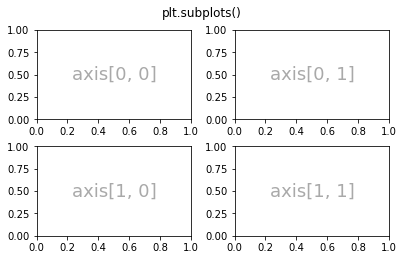

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5), constrained_layout=True) # one fig, 4 axes

for r, row in enumerate(axes):
    for c, col in enumerate(row):
        col.annotate(f'axis[{r}, {c}]', (0.5, 0.5),
                               transform=axes[r, c].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

The dataframe contains 16 states.


Text(0.5, 0.98, 'Coivd-19 deaths')

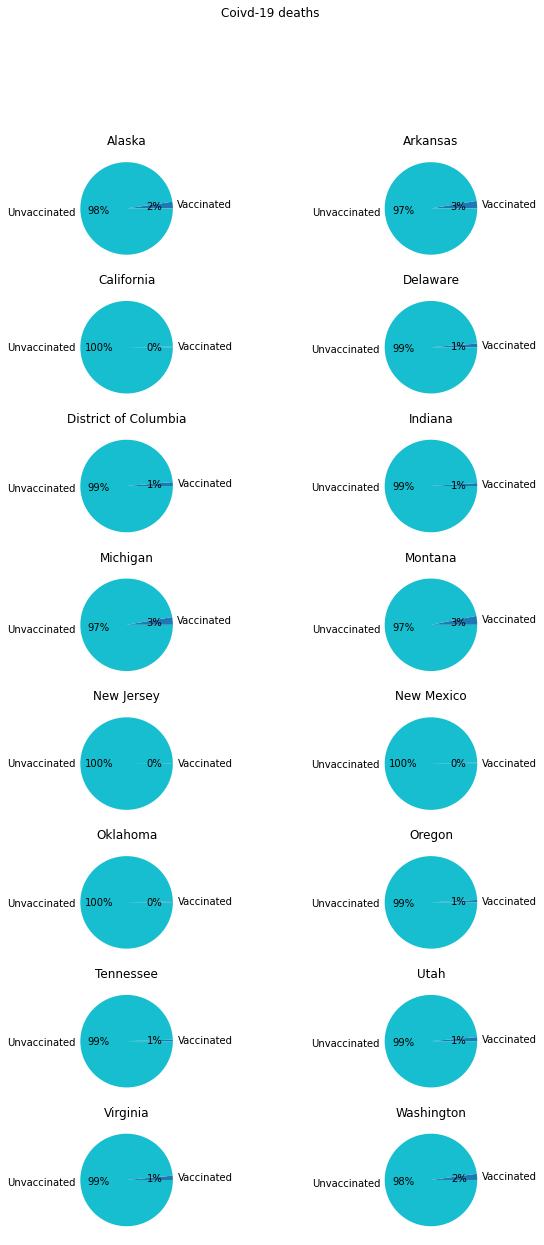

In [25]:
print(f'The dataframe contains {len(df)} states.')
nrows = 8
ncols = 2

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 20))

covid_index = 0
for r, row in enumerate(axes):
    for c, col in enumerate(row):
        state_row = covid_stats[covid_index]
        x = [state_row.vaccinated, state_row.unvaccinated]
        col.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
        col.set_title(state_row.state)
        covid_index += 1
fig.suptitle('Coivd-19 deaths')


# Comprehension

## List comprehension

Reference: https://realpython.com/list-comprehension-python/

From the above:

Every list comprehension in Python includes three elements:

1. expression is the member itself, a call to a method, or any other valid expression that returns a value. In the example above, the expression i * i is the square of the member value.
1. member is the object or value in the list or iterable. In the example above, the member value is i.
1. iterable is a list, set, sequence, generator, or any other object that can return its elements one at a time. In the example above, the iterable is range(10).

In [30]:
# Regular way
squares = []                # init empty list
for i in range(10):         # iterate on something
    square = i * i          # calculate something
    squares.append(square)  # add it to the list
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [31]:
# list comprehension does it all in one line
squares = [i*i for i in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## Dictionary comprehension

While list comprehension builds a list, one element at a time, dictionary comprehension builds the dictionary with a key and value (separated by a : )

Extensive examples: https://towardsdatascience.com/10-examples-to-master-python-dictionary-comprehensions-7aaa536f5960

In [32]:
words = ['data', 'science', 'machine', 'learning']
#list comprehension
l1 = [len(i) for i in words]  # [4, 7, 7, 8]

#dictionary comprehension
d1 = {i:len(i) for i in words} # {'data': 4, 'science': 7, 'machine': 7, 'learning': 8}

## Nested Loops

- We indent for each loop. 
- Innermost loops are the fastest.
- break will break out of the current loop

Recall from Module 4.
```python
for b in b_vec:
    for c in c_vec:
        a = sqrt(b*b + c*c)
        a_vec.append(a
```

In [33]:
from math import sqrt
_MAX = 5
b_vec = list(range(1, _MAX))
c_vec = list(range(1, _MAX))
a_vec = []
for b in b_vec:
    for c in c_vec:
        a = sqrt(b*b + c*c)
        a_vec.append(a)
for i, el in enumerate(a_vec, 1):
    print(f'{el:6.3f}', end=' ')
    if i % (_MAX - 1) == 0:
        print('\n')

 1.414  2.236  3.162  4.123 

 2.236  2.828  3.606  4.472 

 3.162  3.606  4.243  5.000 

 4.123  4.472  5.000  5.657 



In [34]:
_SIDES = 6
for die1 in range(1, _SIDES + 1):
    for die2 in range(1, _SIDES + 1):
        print(f'{die1} + {die2}')
        if die1 + die2 >= 10:
            break

1 + 1
1 + 2
1 + 3
1 + 4
1 + 5
1 + 6
2 + 1
2 + 2
2 + 3
2 + 4
2 + 5
2 + 6
3 + 1
3 + 2
3 + 3
3 + 4
3 + 5
3 + 6
4 + 1
4 + 2
4 + 3
4 + 4
4 + 5
4 + 6
5 + 1
5 + 2
5 + 3
5 + 4
5 + 5
6 + 1
6 + 2
6 + 3
6 + 4
